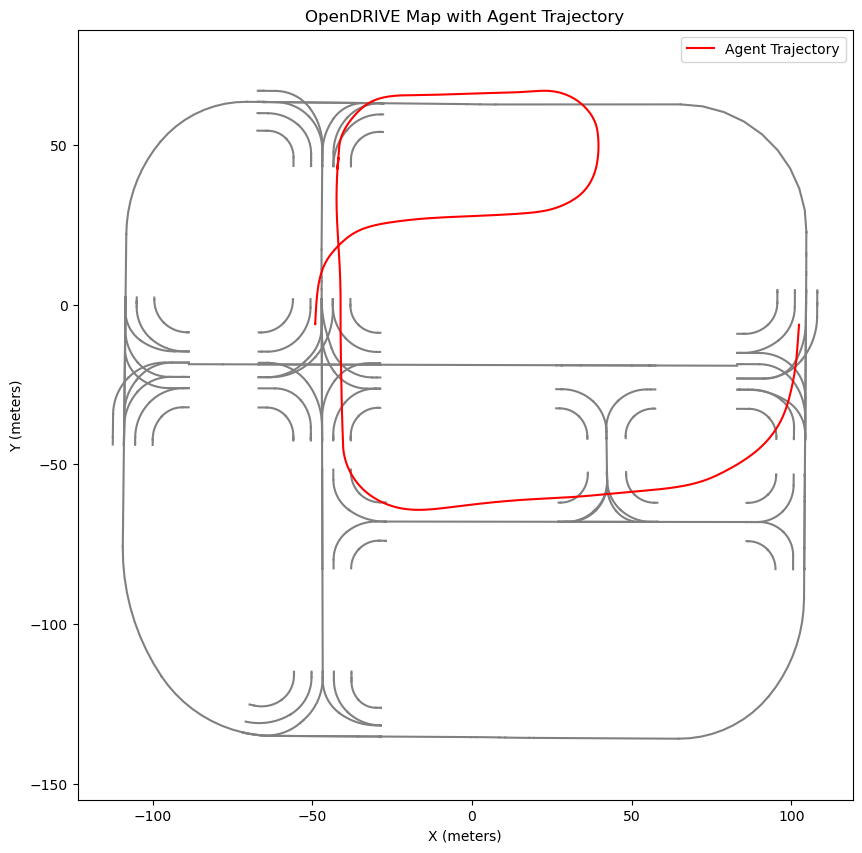

In [14]:
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Utility functions
# -----------------------------
def sample_line_geometry(x, y, hdg, length, num_points=10):
    """Sample points along a straight line"""
    s = np.linspace(0, length, num_points)
    xs = x + s * np.cos(hdg)
    ys = y + s * np.sin(hdg)
    return xs, ys

def sample_arc_geometry(x, y, hdg, length, curvature, num_points=10):
    """Sample points along an arc"""
    s = np.linspace(0, length, num_points)
    theta = s * curvature
    radius = 1/curvature
    xs = x + radius * (np.sin(theta + hdg) - np.sin(hdg))
    ys = y - radius * (np.cos(theta + hdg) - np.cos(hdg))
    return xs, ys

# -----------------------------
# Parse OpenDRIVE file
# -----------------------------
xodr_file = "exported_map.xodr"  # Path to your OpenDRIVE file
tree = ET.parse(xodr_file)
root = tree.getroot()

plt.figure(figsize=(10,10))

for road in root.findall('road'):
    planView = road.find('planView')
    for geom in planView.findall('geometry'):
        x = float(geom.attrib['x'])
        y = float(geom.attrib['y'])
        hdg = float(geom.attrib['hdg'])
        length = float(geom.attrib['length'])
        
        line = geom.find('line')
        arc = geom.find('arc')
        
        if line is not None:
            xs, ys = sample_line_geometry(x, y, hdg, length)
            plt.plot(xs, ys, color='gray')
        
        elif arc is not None:
            curvature = float(arc.attrib['curvature'])
            xs, ys = sample_arc_geometry(x, y, hdg, length, curvature)
            plt.plot(xs, ys, color='gray')

# -----------------------------
# Example agent trajectory
# -----------------------------
import pandas as pd

df = pd.read_csv("/home/remote-ops/Documents/carla-client/recordings/2025-08-26/2/position.csv", header=None)

plt.plot(df[3], df[4], color='red', label='Agent Trajectory')

plt.axis('equal')
plt.xlabel("X (meters)")
plt.ylabel("Y (meters)")
plt.title("OpenDRIVE Map with Agent Trajectory")
plt.legend()
plt.show()
